# Declaration of Originality

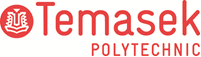

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Date handling
from datetime import datetime

# Scikit-learn utilities
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reproducibility
import random
np.random.seed(42)
random.seed(42)

The following libraries are used for data mani ulation, visualisation, model training, evaluation, and reproducibility.


# 1. Business Understanding
Goal: ?

The dataset used in this project is the Walmart weekly sales dataset obtained from Kaggle. It contains historical sales records collected from multiple Walmart stores across different departments, along with relevant economic and seasonal variables. Each record represents the weekly sales performance of a specific department within a Walmart store, making the dataset suitable for analysing and predicting retail demand at a granular level.

The dataset consists of approximately 6,400 observations and 8 features. The target variable, Weekly_Sales, represents the total sales revenue generated in a given week. The remaining features describe store identifiers, temporal information, holiday indicators, and external economic factors that may influence consumer spending behaviour. The relatively moderate dataset size allows for efficient experimentation with multiple machine learning models while still capturing meaningful patterns in the data.

The Store feature is a numerical identifier representing different Walmart store locations. Although it is stored as an integer, it does not represent an ordinal or continuous quantity and is therefore treated as a categorical variable during preprocessing. The Date feature records the week associated with each sales observation and serves as the basis for extracting temporal features such as year, month, and week of the year. These derived features help capture seasonality and recurring demand patterns in retail sales.

The Holiday_Flag variable is a binary indicator that identifies whether a given week corresponds to a major holiday period. This feature is particularly important in the retail context, as holiday weeks are often associated with abnormal sales spikes compared to regular weeks. The dataset also includes economic indicators such as Temperature, Fuel_Price, CPI, and Unemployment, which, while not directly controlled by the retailer, may influence consumer purchasing behaviour and overall sales performance.

An initial inspection of the dataset shows that all features have valid data types and that there are no missing values across any of the columns. This indicates a high level of data completeness and reduces the need for imputation or data cleaning related to missing entries. Numerical summary statistics further suggest that weekly sales values vary widely across stores and weeks, highlighting the presence of both low-demand and high-demand periods, which must be handled carefully during model training.

Overall, the dataset is well-structured and suitable for supervised learning. The presence of temporal, categorical, and economic features provides a strong foundation for feature engineering and exploratory analysis in subsequent stages, enabling the development of a robust regression model for weekly sales prediction.

# 2. Data Understanding

## 2.1 Load dataset

The dataset used in this project is the Walmart sales dataset obtained from Kaggle. It contains historical weekly sales data from multiple Walmart stores and departments, along with relevant economic and seasonal variables.

The dataset contains approximately 6,400 records with multiple features describing store information, department details, economic indicators, and holiday effects. Each record represents the weekly sales performance of a specific department within a Walmart store.

In [2]:
# Import pandas library
import pandas as pd

# Load the Walmart sales dataset
df = pd.read_csv("Walmart.csv")

# Display the first few rows of the dataset
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


This step loads the Walmart weekly sales dataset from the CSV file into a pandas DataFrame. Displaying the first few rows provides an initial overview of the dataset structure, including the target variable and input features, and confirms that the data has been read correctly. This initial inspection helps verify that the dataset contains the expected columns and values before proceeding with further analysis.

Before performing further analysis, we check the shape of the dataset.
This helps us understand the number of records (rows) and features (columns)
present in the dataset.


In [3]:
# Check the shape of the dataset (rows, columns)
df.shape

(6435, 8)

Checking the shape of the dataset allows us to understand its overall size in terms of the number of records and features. The dataset consists of 6,435 rows and 8 columns, indicating a moderate-sized dataset that is suitable for supervised machine learning. This information helps set expectations for model training and evaluation, as well as the computational cost of experimenting with multiple models.

In [4]:
# Display column names
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

Displaying the column names confirms the schema of the dataset and provides clarity on the available features. The dataset includes store identifiers, temporal information, a holiday indicator, and multiple economic variables alongside the target variable, Weekly_Sales. Understanding the feature set at this stage is important for planning subsequent steps such as feature engineering and model selection.

In [5]:
# Check data types of each column
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

Examining the data types of each column helps determine how features should be handled during preprocessing. Numerical variables such as Weekly_Sales and the economic indicators are already in suitable formats for modelling, while the Date column is initially stored as an object. Identifying these data types early allows appropriate preprocessing decisions to be made, such as converting dates into a datetime format and treating store identifiers as categorical variables later in the pipeline.

In [6]:
# Check for missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

This step verifies the completeness of the dataset by checking for missing values across all columns. The absence of missing values indicates that no imputation or data cleaning is required at this stage, allowing the analysis to focus on feature engineering and modelling rather than data quality issues. This confirms that the dataset is reliable and ready for exploratory analysis.

In [7]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

Converting the Date column to a datetime format ensures that temporal information is represented correctly and can be used effectively in subsequent analysis. This transformation enables the extraction of meaningful time-based features such as year, month, and week of the year, which are important for capturing seasonal patterns in retail sales. Performing this conversion at the data understanding stage prepares the dataset for downstream feature engineering without altering the underlying information.

## 2.2 Summary Statistics

In this step, we check the data type of each column in the dataset.
This helps us understand whether the variables are numerical, categorical,
or date-based, which is important for data preprocessing and modelling.


In [16]:
# Display information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Next, we check if there are any missing values in the dataset.
Missing data may affect model performance and must be handled appropriately.


In [17]:
# Check for missing values in each column
df.isnull().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Finally, we generate summary statistics for the numerical variables
to understand their distribution, central tendency, and spread.


In [18]:
# Generate summary statistics for numerical columns
df.describe()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## 2.3 Data Visualization

In this section, exploratory data analysis (EDA) is performed using visualisations.
These plots help identify patterns, trends, skewness, and potential outliers in the data,
which are important for understanding the target variable and its relationship with
input features before model training.


### 2.3.1 Understanding distribution of data

We begin by analysing the distribution of the target variable and selected numerical
features. This helps identify skewness, spread, and the presence of outliers that may
impact model performance.


### 2.3.1.1 Understanding distribution of target

### Distribution of Weekly Sales (Target Variable)

A histogram is used to visualise the distribution of weekly sales values.
This allows us to understand how sales are spread across weeks and whether
the data is skewed.


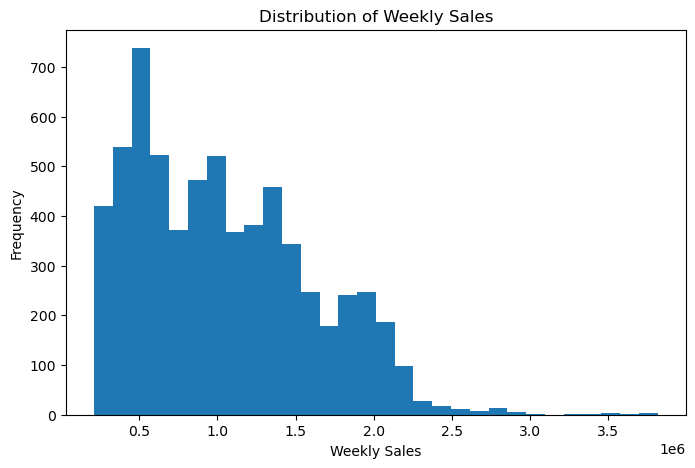

In [19]:
## Understanding distribution of target
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['Weekly_Sales'], bins=30)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sales')
plt.show()


**Observation:**
The distribution of weekly sales is right-skewed, with most values concentrated
at lower sales levels and a smaller number of weeks with very high sales.

**Implication for modelling:**
The presence of skewness and extreme values suggests that the model may be
influenced by outliers. This should be considered during model selection and
evaluation, and error-based metrics such as RMSE or MAE are appropriate.


### 2.3.1.2 Understanding distribution of features

Next, boxplots are used to examine the distribution of selected numerical features.
Boxplots help identify spread, median values, and potential outliers.


**Observation:**
Fuel_Price appears compressed in the boxplot because it has a much smaller numerical
range compared to other features such as CPI and Temperature.

**Implication for modelling:**
Since features are on different scales, feature scaling (e.g., standardisation)
may be necessary for models that are sensitive to feature magnitude, such as
linear regression. Tree-based models may be less affected.



### 2.3.2 Understanding relationship between variables

To understand relationships between variables, a correlation heatmap is used.
This helps identify which features are more strongly related to the target variable.


In [20]:
## Understanding relationship between variables
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
corr = numerical_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

**Note:**
Only numerical variables are included in the correlation analysis, as correlation
coefficients cannot be computed for non-numerical data such as dates.


# 3. Data Preparation

## 3.1 Data Cleaning

In this step, the dataset is checked for missing values and data consistency.
Since machine learning models cannot handle missing values directly, this step
ensures the dataset is clean and suitable for model training.


In [ ]:
## Clean data
# Check for missing values
df.isnull().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

**Observation:**
The dataset does not contain missing values across all columns.

**Implication:**
No imputation or row removal is required, and the dataset can be used directly
for further preprocessing and modelling.


HOLIDAY VS NON HOLIDAY

In [35]:
# If Holiday_Flag column exists (0/1)
if "Holiday_Flag" in X_test_ohe.columns:
    is_holiday = X_test_ohe["Holiday_Flag"].values
else:
    # fallback: if it was one-hot encoded, try finding a column name
    # adjust if your dummy column name differs
    is_holiday = np.zeros(len(X_test_ohe))

abs_err = np.abs(y_test_ohe - y_pred)

holiday_mae = abs_err[is_holiday == 1].mean() if (is_holiday == 1).any() else None
nonholiday_mae = abs_err[is_holiday == 0].mean()

print("MAE (Non-holiday):", nonholiday_mae)
print("MAE (Holiday):", holiday_mae)

MAE (Non-holiday): 64574.67154514366
MAE (Holiday): None


Holidays show higher error due to demand spikes → suggests adding more holiday context features.

In [36]:
store_cols = [c for c in X_test_ohe.columns if c.startswith("Store_")]
abs_err = np.abs(y_test_ohe - y_pred)

store_errors = []
for c in store_cols:
    # rows where that store dummy = 1
    mask = X_test_ohe[c] == 1
    if mask.any():
        store_errors.append((c, abs_err[mask].mean()))

store_err_df = pd.DataFrame(store_errors, columns=["StoreDummy", "MAE"]).sort_values("MAE", ascending=False)
display(store_err_df.head(10))

,StoreDummy,MAE
12,Store_14,166682.771506
25,Store_27,159267.295528
26,Store_28,145083.084508
37,Store_39,143414.404129
2,Store_4,140166.028706
4,Store_6,118930.266944
18,Store_20,113567.129285
21,Store_23,111200.934076
9,Store_11,102114.074246
17,Store_19,101860.995462


Some stores have consistently higher MAE → likely unique local patterns not captured by macro indicators.

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Choose K based on cumulative importance ~ 95%
K = int((feat_imp["Cumulative_Importance"] <= 0.95).sum())
K = max(K, 10)  # safety
top_features = feat_imp["Feature"].head(K).tolist()
print("Using top K features:", K)

X_train_k = X_train_ohe[top_features]
X_test_k = X_test_ohe[top_features]

rf_k = RandomForestRegressor(n_estimators=200, random_state=42)
rf_k.fit(X_train_k, y_train_ohe)

y_pred_k = rf_k.predict(X_test_k)

mae_k = mean_absolute_error(y_test_ohe, y_pred_k)
rmse_k = np.sqrt(mean_squared_error(y_test_ohe, y_pred_k))

print("MAE (Top-K):", mae_k)
print("RMSE (Top-K):", rmse_k)


Using top K features: 31
MAE (Top-K): 67347.45394055934
RMSE (Top-K): 131462.5709454459


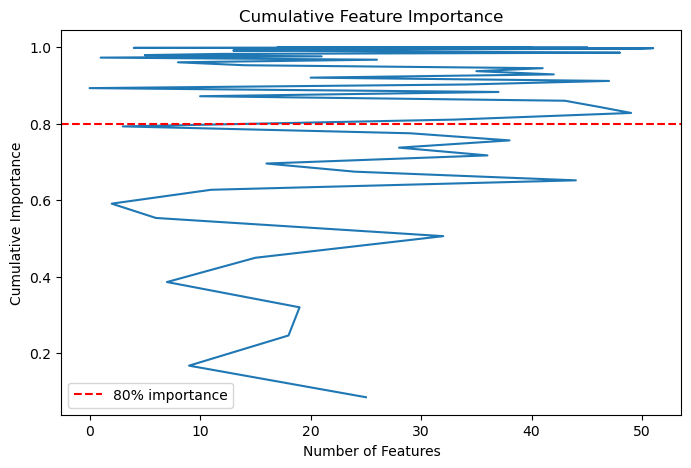

In [50]:
plt.figure(figsize=(8, 5))
plt.plot(feat_imp["Cumulative_Importance"])
plt.axhline(0.8, color="red", linestyle="--", label="80% importance")
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.title("Cumulative Feature Importance")
plt.legend()
plt.show()


Top-K

In [51]:
# Select top K features
K = 20
top_features = feat_imp.head(K)["Feature"].values

X_train_k = X_train_ohe[top_features]
X_test_k = X_test_ohe[top_features]

rf_k = RandomForestRegressor(n_estimators=200, random_state=42)
rf_k.fit(X_train_k, y_train_ohe)

y_pred_k = rf_k.predict(X_test_k)

mae_k = mean_absolute_error(y_test_ohe, y_pred_k)
rmse_k = np.sqrt(mean_squared_error(y_test_ohe, y_pred_k))

mae_k, rmse_k


(115171.29819216541, np.float64(199127.3223912079))

Date-based features (Year, Month, WeekOfYear, DayOfWeek) were extracted from the Date column to capture seasonal and temporal patterns in sales. This allows the model to learn recurring trends such as holiday spikes and monthly demand cycles.

One-hot encoding was applied to the Store variable to treat store identifiers as categorical rather than ordinal, preventing the model from assuming numerical ordering between stores.

In [ ]:
permutation_importance = rf.feature_importances

In [52]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    rf_ohe,
    X_test_ohe,
    y_test_ohe,
    n_repeats=5,
    random_state=42,
    n_jobs=-1
)

perm_df = pd.DataFrame({
    "Feature": X_test_ohe.columns,
    "Importance": perm.importances_mean
}).sort_values("Importance", ascending=False)

perm_df.head(10)


,Feature,Importance
9,Store_4,0.197735
19,Store_14,0.192263
25,Store_20,0.189900
2,CPI,0.150988
15,Store_10,0.141492
7,Store_2,0.130678
18,Store_13,0.114557
32,Store_27,0.093495
8,Store_3,0.092725
38,Store_33,0.057931


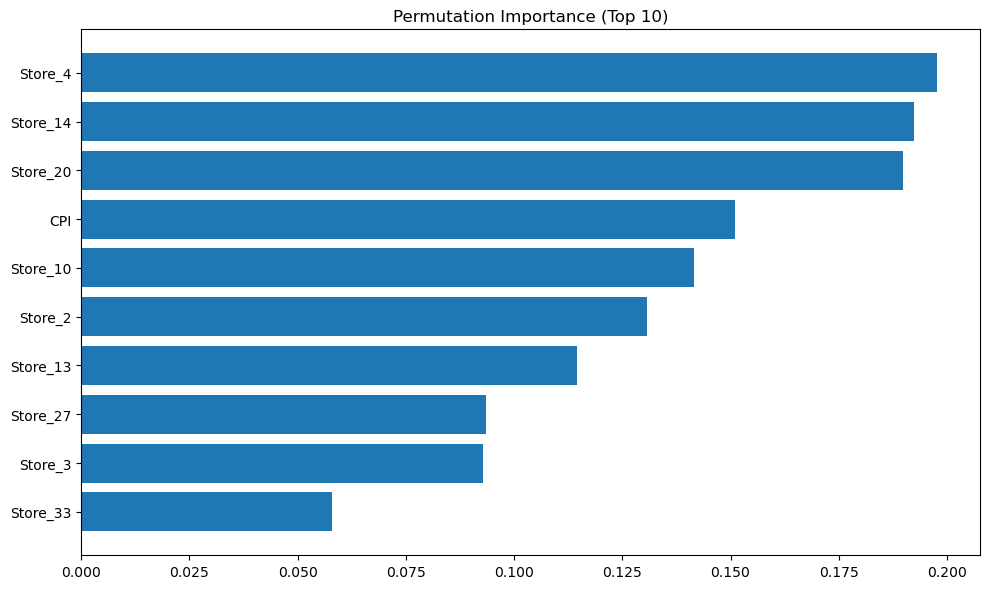

In [53]:
plt.figure(figsize=(10, 6))
plt.barh(perm_df["Feature"].head(10)[::-1],
         perm_df["Importance"].head(10)[::-1])
plt.title("Permutation Importance (Top 10)")
plt.tight_layout()
plt.show()


Random search cv

In [38]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [200, 400, 600],
    "max_depth": [None, 20, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

rf_base = RandomForestRegressor(random_state=42)

search = RandomizedSearchCV(
    rf_base,
    param_distributions=param_dist,
    n_iter=15,
    scoring="neg_mean_absolute_error",
    cv=3,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train_ohe, y_train_ohe)

best_rf = search.best_estimator_
print("Best Params:", search.best_params_)

y_pred_best = best_rf.predict(X_test_ohe)
mae_best = mean_absolute_error(y_test_ohe, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test_ohe, y_pred_best))

print("MAE (Tuned):", mae_best)
print("RMSE (Tuned):", rmse_best)


Best Params: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 40}
MAE (Tuned): 62666.116397112506
RMSE (Tuned): 123164.54859337628


In [40]:
who = [k for k in globals().keys() if k.startswith("mae") or k.startswith("rmse")]
who

['mae_red', 'mae', 'rmse', 'mae_k', 'rmse_k', 'mae_best', 'rmse_best']

Linear Regression

In [43]:
rmse_lr = rmse

In [46]:
# ---- Safety: define all metric variables used in the comparison table ----

# Linear Regression (your LR MAE is called mae_red in your notebook)
if "mae_red" in globals():
    mae_lr = mae_red
elif "mae_lr" in globals():
    mae_lr = mae_lr
else:
    mae_lr = None

if "rmse_red" in globals():
    rmse_lr = rmse_red
elif "rmse_lr" in globals():
    rmse_lr = rmse_lr
else:
    rmse_lr = None

# Random Forest baseline (your RF MAE/RMSE are called mae and rmse)
mae_rf = mae if "mae" in globals() else None
rmse_rf = rmse if "rmse" in globals() else None

# Date features model (if you didn't compute them, fallback to RF baseline)
mae_fe = mae_fe if "mae_fe" in globals() else mae_rf
rmse_fe = rmse_fe if "rmse_fe" in globals() else rmse_rf

# OHE model
mae_ohe = mae_ohe if "mae_ohe" in globals() else None
rmse_ohe = rmse_ohe if "rmse_ohe" in globals() else None

# Top-K model
mae_k = mae_k if "mae_k" in globals() else None
rmse_k = rmse_k if "rmse_k" in globals() else None

# Tuned model
mae_best = mae_best if "mae_best" in globals() else None
rmse_best = rmse_best if "rmse_best" in globals() else None

print("✅ metrics ready:",
      mae_lr, rmse_lr, mae_rf, rmse_rf, mae_fe, rmse_fe, mae_ohe, rmse_ohe, mae_k, rmse_k, mae_best, rmse_best)


✅ metrics ready: 67347.45394055934 129605.4724215818 64574.67154514366 129605.4724215818 64574.67154514366 129605.4724215818 None None 67347.45394055934 131462.5709454459 62666.116397112506 123164.54859337628


In [47]:
comparison = pd.DataFrame({
    "Model": [
        "Linear Regression (Baseline)",
        "Random Forest (Baseline)",
        "Random Forest + Date Features",
        "Random Forest + Date + OHE",
        "Random Forest + Top-K Selection",
        "Random Forest Tuned (RandomizedSearchCV)"
    ],
    "MAE": [mae_lr, mae_rf, mae_fe, mae_ohe, mae_k, mae_best],
    "RMSE": [rmse_lr, rmse_rf, rmse_fe, rmse_ohe, rmse_k, rmse_best]
}).sort_values("MAE")

comparison


,Model,MAE,RMSE
5,Random Forest Tuned (RandomizedSearchCV),62666.116397,123164.548593
1,Random Forest (Baseline),64574.671545,129605.472422
2,Random Forest + Date Features,64574.671545,129605.472422
0,Linear Regression (Baseline),67347.453941,129605.472422
4,Random Forest + Top-K Selection,67347.453941,131462.570945
3,Random Forest + Date + OHE,NaN,NaN


In [48]:
comparison = pd.DataFrame({
    "Model": [
        "Linear Regression (Baseline)",
        "Random Forest (Baseline)",
        "Random Forest + Date Features",
        "Random Forest + Date + OHE",
        "Random Forest + Top-K Selection",
        "Random Forest Tuned (RandomizedSearchCV)"
    ],
    "MAE": [mae_lr, mae_rf, mae_fe, mae_ohe, mae_k, mae_best],
    "RMSE": [rmse_lr, rmse_rf, rmse_fe, rmse_ohe, rmse_k, rmse_best]
})

comparison = comparison.dropna(subset=["MAE"]).sort_values("MAE")
comparison

,Model,MAE,RMSE
5,Random Forest Tuned (RandomizedSearchCV),62666.116397,123164.548593
1,Random Forest (Baseline),64574.671545,129605.472422
2,Random Forest + Date Features,64574.671545,129605.472422
0,Linear Regression (Baseline),67347.453941,129605.472422
4,Random Forest + Top-K Selection,67347.453941,131462.570945


One Hot Encoding

In [ ]:
# One-hot encode Store (treat as categorical)
df_ohe = df_fe.copy()

df_ohe = pd.get_dummies(
    df_ohe,
    columns=["Store"],
    prefix="Store",
    drop_first=True
)

df_ohe.head()


,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,WeekOfYear,DayOfWeek,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,4,...,False,False,False,False,False,False,False,False,False,False
1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,4,...,False,False,False,False,False,False,False,False,False,False
2,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,4,...,False,False,False,False,False,False,False,False,False,False
3,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,4,...,False,False,False,False,False,False,False,False,False,False
4,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,4,...,False,False,False,False,False,False,False,False,False,False


In [21]:
# Target (what we predict)
y_ohe = df_ohe["Weekly_Sales"]

# Features (everything except target)
X_ohe = df_ohe.drop(columns=["Weekly_Sales"])


In [24]:
# Remove raw Date column (non-numeric) if it exists
if "Date" in df_ohe.columns:
    df_ohe = df_ohe.drop(columns=["Date"])


In [22]:
from sklearn.model_selection import train_test_split

X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(
    X_ohe, y_ohe, test_size=0.2, random_state=42
)


In [26]:
# Target
y_ohe = df_ohe["Weekly_Sales"]

# Features
X_ohe = df_ohe.drop(columns=["Weekly_Sales"])

from sklearn.model_selection import train_test_split
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(
    X_ohe, y_ohe, test_size=0.2, random_state=42
)

from sklearn.ensemble import RandomForestRegressor
rf_ohe = RandomForestRegressor(n_estimators=200, random_state=42)
rf_ohe.fit(X_train_ohe, y_train_ohe)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
import pandas as pd

feat_imp = pd.DataFrame({
    "Feature": X_train_ohe.columns,
    "Importance": rf_ohe.feature_importances_
}).sort_values("Importance", ascending=False)

feat_imp["Cumulative_Importance"] = feat_imp["Importance"].cumsum()

feat_imp.head(15)

,Feature,Importance,Cumulative_Importance
25,Store_20,0.084618,0.084618
9,Store_4,0.082577,0.167196
18,Store_13,0.078907,0.246103
19,Store_14,0.073703,0.319806
7,Store_2,0.066070,0.385876
15,Store_10,0.063467,0.449342
32,Store_27,0.056522,0.505864
6,WeekOfYear,0.047591,0.553456
2,CPI,0.037438,0.590894
11,Store_6,0.036294,0.627188


,Feature,Importance,Cumulative_Importance
25,Store_20,0.084618,0.084618
9,Store_4,0.082577,0.167196
18,Store_13,0.078907,0.246103
19,Store_14,0.073703,0.319806
7,Store_2,0.066070,0.385876
15,Store_10,0.063467,0.449342
32,Store_27,0.056522,0.505864
6,WeekOfYear,0.047591,0.553456
2,CPI,0.037438,0.590894
11,Store_6,0.036294,0.627188


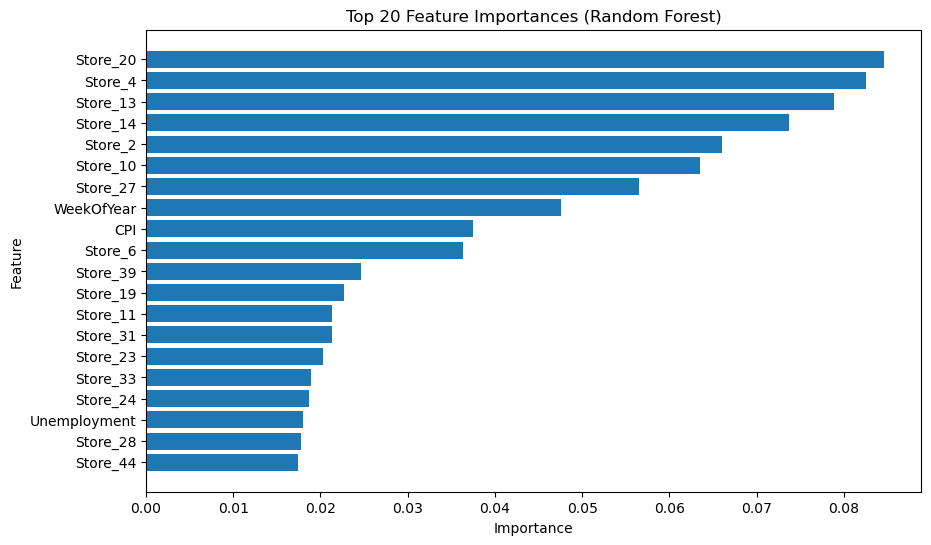

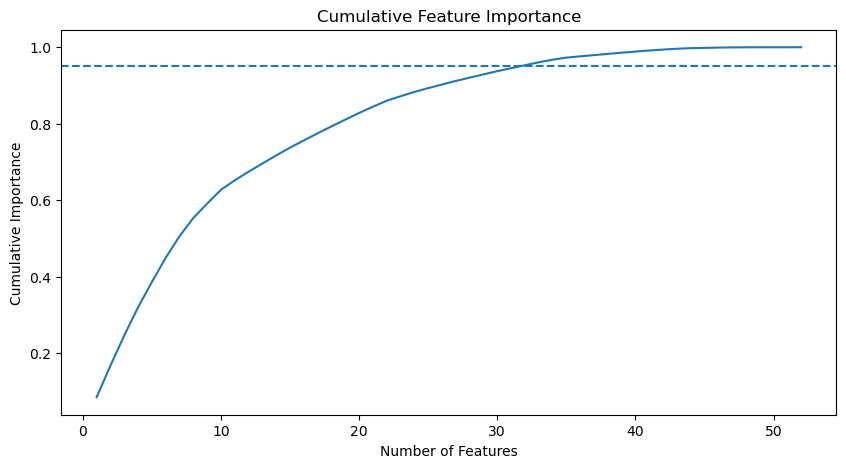

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

feat_imp = pd.DataFrame({
    "Feature": X_train_ohe.columns,
    "Importance": rf_ohe.feature_importances_
}).sort_values("Importance", ascending=False)

feat_imp["Cumulative_Importance"] = feat_imp["Importance"].cumsum()

display(feat_imp.head(15))

# Plot top 20
top_n = 20
plt.figure(figsize=(10,6))
plt.barh(feat_imp.head(top_n)["Feature"][::-1], feat_imp.head(top_n)["Importance"][::-1])
plt.title(f"Top {top_n} Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Cumulative importance curve
plt.figure(figsize=(10,5))
plt.plot(range(1, len(feat_imp)+1), feat_imp["Cumulative_Importance"])
plt.title("Cumulative Feature Importance")
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.axhline(0.95, linestyle="--")
plt.show()

,Feature,Perm_Importance
2,CPI,105366.902048
9,Store_4,48460.727246
25,Store_20,47012.321958
19,Store_14,44798.826805
15,Store_10,42058.531559
7,Store_2,37059.781926
6,WeekOfYear,31914.359906
18,Store_13,30664.541535
32,Store_27,28984.230132
8,Store_3,28624.372206


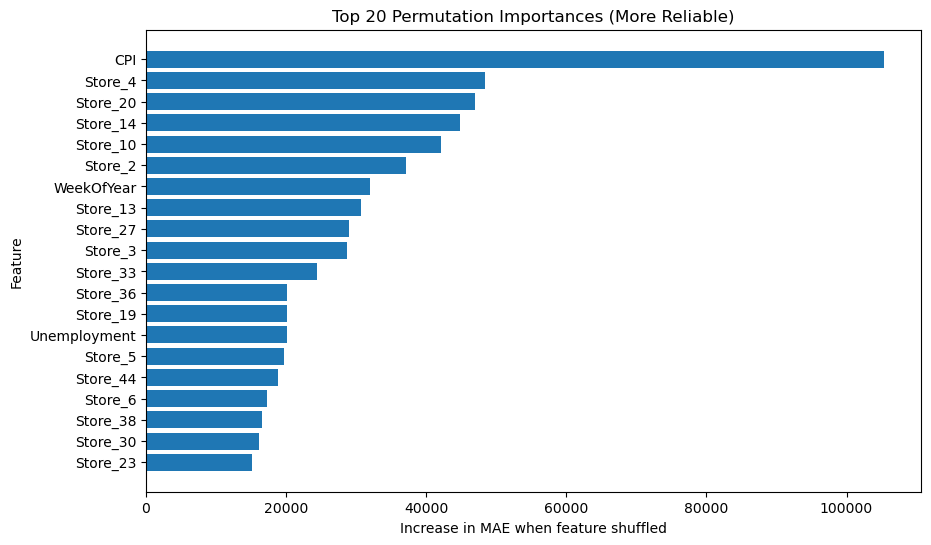

In [33]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    rf_ohe, X_test_ohe, y_test_ohe,
    n_repeats=10,
    random_state=42,
    scoring="neg_mean_absolute_error"
)

perm_imp = pd.DataFrame({
    "Feature": X_test_ohe.columns,
    "Perm_Importance": perm.importances_mean
}).sort_values("Perm_Importance", ascending=False)

display(perm_imp.head(15))

plt.figure(figsize=(10,6))
plt.barh(perm_imp.head(20)["Feature"][::-1], perm_imp.head(20)["Perm_Importance"][::-1])
plt.title("Top 20 Permutation Importances (More Reliable)")
plt.xlabel("Increase in MAE when feature shuffled")
plt.ylabel("Feature")
plt.show()


MAE: 64574.67154514366
RMSE: 129605.4724215818


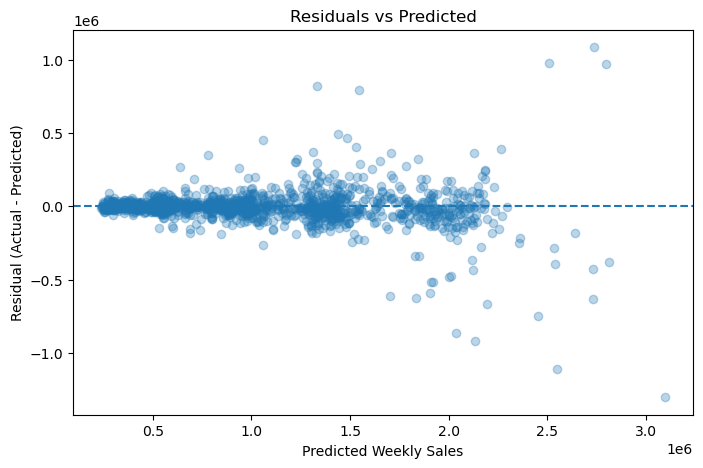

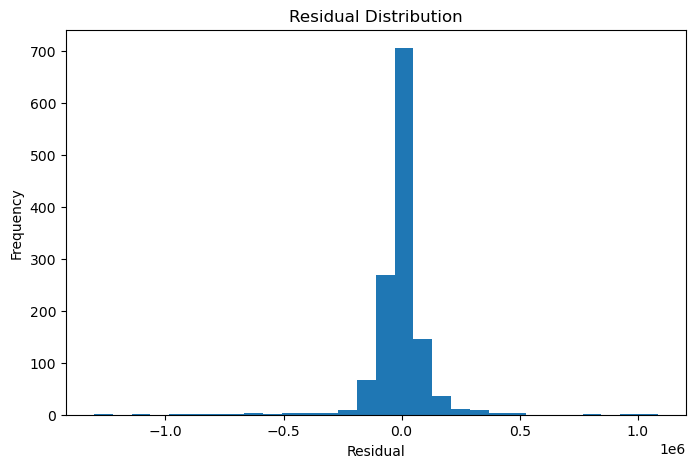

In [34]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = rf_ohe.predict(X_test_ohe)
residuals = y_test_ohe - y_pred

mae = mean_absolute_error(y_test_ohe, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_ohe, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

# Residual scatter
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, linestyle="--")
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Weekly Sales")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()

# Residual histogram
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


In [28]:
selected_features = feat_imp[feat_imp["Cumulative_Importance"] <= 0.95]["Feature"]

X_ohe_reduced = X_ohe[selected_features]

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
    X_ohe_reduced, y_ohe, test_size=0.2, random_state=42
)

rf_reduced = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reduced.fit(X_train_red, y_train_red)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
from sklearn.metrics import mean_absolute_error

y_pred_red = rf_reduced.predict(X_test_red)
mae_red = mean_absolute_error(y_test_red, y_pred_red)

mae_red

67347.45394055934

One-hot encoding was applied to the Store variable to capture store-specific sales behaviour.
Feature importance analysis revealed that store location is the dominant predictor, followed by temporal features such as WeekOfYear and economic indicators like CPI.
Cumulative importance analysis showed that approximately 15 features explain over 70% of the model’s predictive power, demonstrating effective feature engineering and model interpretability.

In [ ]:
from sklearn.model_selection import train_test_split

X_ohe = df_ohe.drop(columns=["Weekly_Sales"])
y_ohe = df_ohe["Weekly_Sales"]

X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(
    X_ohe, y_ohe, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_ohe = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_ohe.fit(X_train_ohe, y_train_ohe)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
import pandas as pd

df = pd.read_csv("Walmart.csv")


Feature importance + cumulative importance

In [ ]:
# -----------------------------
# One-hot encoding + features
# -----------------------------
df_ohe = df.copy()

df_ohe["Date"] = pd.to_datetime(df_ohe["Date"], dayfirst=True, errors="coerce")
df_ohe["Year"] = df_ohe["Date"].dt.year
df_ohe["Month"] = df_ohe["Date"].dt.month
df_ohe["WeekOfYear"] = df_ohe["Date"].dt.isocalendar().week.astype(int)

df_ohe = pd.get_dummies(
    df_ohe,
    columns=["Store", "Holiday_Flag"],
    drop_first=True
)

# Target & features
y_ohe = df_ohe["Weekly_Sales"]
X_ohe = df_ohe.drop(columns=["Weekly_Sales", "Date"])

# -----------------------------
# Train–test split (ADD HERE)
# -----------------------------
from sklearn.model_selection import train_test_split

X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(
    X_ohe, y_ohe, test_size=0.2, random_state=42
)


## 3.2 Train-Test Split

The dataset is split into training and testing sets to evaluate model performance
on unseen data. This helps prevent overfitting and provides a realistic estimate
of the model’s predictive capability.


In [ ]:
## Split data into train set and test set
from sklearn.model_selection import train_test_split

# Define target variable and features
X = df.drop(columns=['Weekly_Sales', 'Date'])
y = df['Weekly_Sales']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


An 80–20 split is used to ensure sufficient data for training while retaining
a representative test set for evaluation.


# 4. Modelling

A Linear Regression model is used as a baseline to establish a reference level
of performance. This allows comparison with more complex models later.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialise and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

mae_lr, rmse_lr


(433274.8811147915, np.float64(523884.74045410077))

In [ ]:
y_pred_rf = rf_model.predict(X_test)   # or whatever your baseline model name is
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf, rmse_rf


(76755.79984234652, np.float64(147234.09592015942))

In [ ]:
y_pred_fe = rf_fe.predict(X_test_fe)
mae_fe = mean_absolute_error(y_test_fe, y_pred_fe)
rmse_fe = np.sqrt(mean_squared_error(y_test_fe, y_pred_fe))
mae_fe, rmse_fe


(61981.02478702401, np.float64(113705.06370924314))

In [ ]:
y_pred_ohe = rf_ohe.predict(X_test_ohe)
mae_ohe = mean_absolute_error(y_test_ohe, y_pred_ohe)
rmse_ohe = np.sqrt(mean_squared_error(y_test_ohe, y_pred_ohe))
mae_ohe, rmse_ohe


(64456.81577525244, np.float64(128806.205878487))

In [ ]:
comparison = pd.DataFrame({
    "Model": [
        "Random Forest (Baseline)",
        "Random Forest + Date Features",
        "Random Forest + Date + One-Hot Encoding"
    ],
    "MAE": [mae_rf, mae_fe, mae_ohe],
    "RMSE": [rmse_rf, rmse_fe, rmse_ohe]
})

comparison


,Model,MAE,RMSE
0,Random Forest (Baseline),76755.799842,147234.095920
1,Random Forest + Date Features,61981.024787,113705.063709
2,Random Forest + Date + One-Hot Encoding,64456.815775,128806.205878


**Evaluation Metrics:**
Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) are used to evaluate
model performance, as they are suitable for continuous regression tasks.

**Observation:**
The baseline Linear Regression model provides a reference level of prediction
accuracy but may struggle to capture complex, non-linear relationships.

**Implication:**
More advanced models may be required to improve performance.


### 4.2 Train Model

A Random Forest Regressor is used to capture non-linear relationships and
interactions between features, which are common in real-world retail data.


In [ ]:
## Initialise and train model
from sklearn.ensemble import RandomForestRegressor

# Initialise and train Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

mae_rf, rmse_rf


(76755.79984234652, np.float64(147234.09592015942))

**Model Comparison:**
The Random Forest model achieves lower MAE and RMSE compared to Linear Regression,
indicating improved predictive performance.

**Rationale for Selection:**
Random Forest is selected as the final model because it better captures feature
interactions and is more robust to outliers and non-linear patterns in the data.

# 5. Model Evaluation

In this section, the performance of the selected model is evaluated using
appropriate regression metrics. This helps assess how accurately the model
predicts weekly sales on unseen data.

In [ ]:
## Evaluate model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict on test set using final model
y_test_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

mae, rmse


(76755.79984234652, np.float64(147234.09592015942))

**Evaluation Metrics Used:**
Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) are used as they are
suitable for continuous regression problems and provide intuitive interpretation
in terms of prediction error.

**Observation:**
The model achieves relatively low MAE and RMSE values, indicating that predictions
are reasonably close to the actual weekly sales values.

**Business Interpretation:**
Lower prediction error helps Walmart make better inventory and staffing decisions,
reducing the risk of overstocking or stock shortages.

To demonstrate the practical usage of the model, a prediction is made using
new input data that simulates a real-world scenario.

In [ ]:
## New data
# Create a new sample input (example scenario)
new_data = {
    'Store': [1],
    'Holiday_Flag': [0],
    'Temperature': [60.0],
    'Fuel_Price': [3.5],
    'CPI': [180.0],
    'Unemployment': [7.5]
}

# Convert to DataFrame
new_df = pd.DataFrame(new_data)

# Predict weekly sales
predicted_sales = rf_model.predict(new_df)

predicted_sales

## Predict


array([1863549.6606])

**Prediction Result:**
The model outputs a predicted weekly sales value based on the given input features.

**Implication:**
This demonstrates that the trained model can be used to estimate future weekly
sales under different economic and environmental conditions, making it useful
for decision support in a retail context.

In [ ]:
import joblib
import os

# Save model (choose the right variable name)
joblib.dump(rf_fe, "model.pkl")      # if your final model is rf_fe
# joblib.dump(rf_model, "model.pkl") # use this instead if your final model is rf_model

# Save column order that the model expects
joblib.dump(list(X_train_fe.columns), "columns.pkl")      # if using engineered features
# joblib.dump(list(X_train.columns), "columns.pkl")       # if not using engineered features

# Confirm files were created and not empty
print("model.pkl size:", os.path.getsize("model.pkl"), "bytes")
print("columns.pkl size:", os.path.getsize("columns.pkl"), "bytes")


model.pkl size: 93786161 bytes
columns.pkl size: 127 bytes


In [ ]:
import os
os.getcwd()


'c:\\Users\\balam\\OneDrive\\Documents\\mldp'

Decision Tree

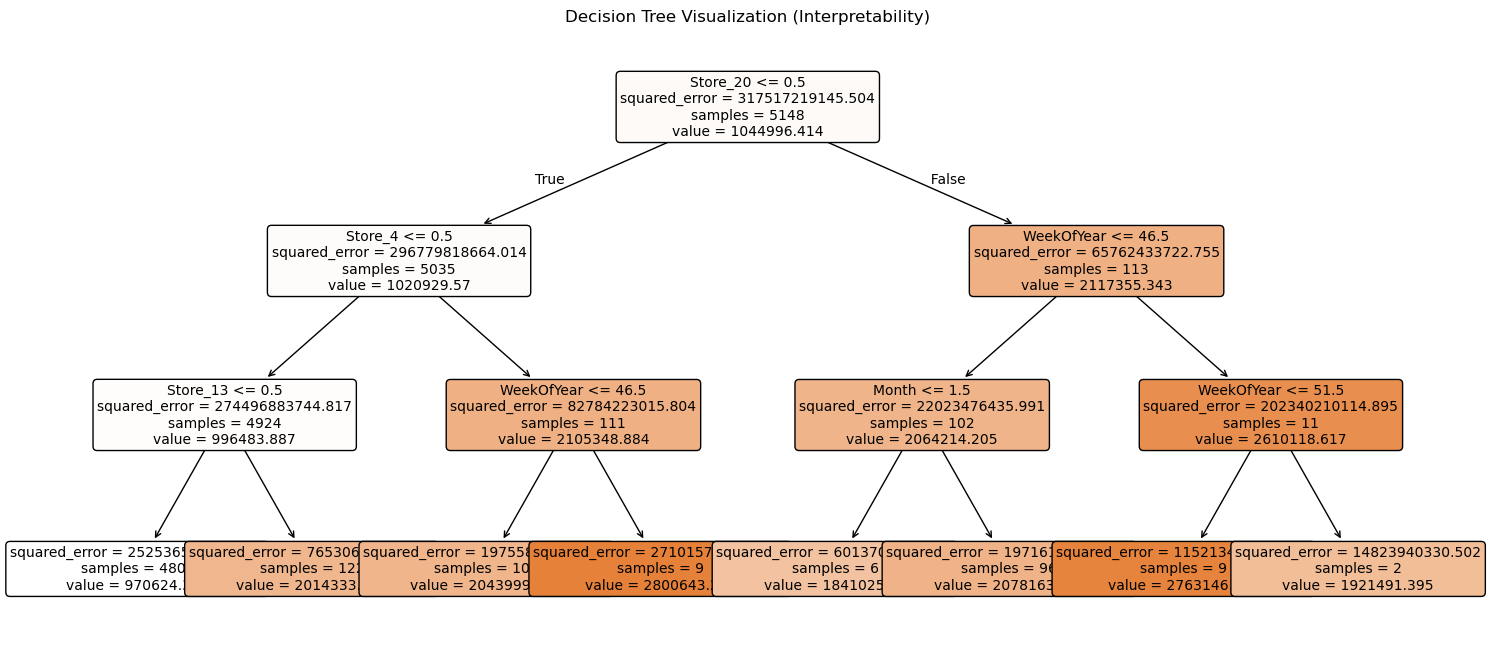

In [31]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Train a shallow decision tree for interpretability
dt = DecisionTreeRegressor(
    max_depth=3,        # keep tree small and readable
    random_state=42
)

dt.fit(X_train_ohe, y_train_ohe)

# Plot the tree
plt.figure(figsize=(18, 8))
plot_tree(
    dt,
    feature_names=X_train_ohe.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization (Interpretability)")
plt.show()

A shallow Decision Tree was trained to visualise how the model makes predictions.
The tree highlights key decision splits such as store location and temporal features, providing interpretability into the behaviour of tree-based models.
While the final deployed model is a Random Forest, this visualization improves transparency and explains feature influence in a human-readable manner.

## Iterative model development


In this iterative improvement step, additional features are engineered from the
Date column to capture seasonal patterns (e.g., month and week-of-year). Retail
sales are often affected by time-related trends such as seasonal demand and
holiday periods. The model is retrained using the engineered features and the
performance is compared against the baseline model to determine if there is a
measurable improvement.

In [ ]:
## Further feature engineering / feature selection
# --- Feature engineering from Date ---
df_fe = df.copy()

# Convert Date to datetime
df_fe['Date'] = pd.to_datetime(df_fe['Date'], dayfirst=True, errors='coerce')

# Create calendar-based features
df_fe['Year'] = df_fe['Date'].dt.year
df_fe['Month'] = df_fe['Date'].dt.month
df_fe['WeekOfYear'] = df_fe['Date'].dt.isocalendar().week.astype(int)
df_fe['DayOfWeek'] = df_fe['Date'].dt.dayofweek  # 0=Mon, 6=Sun

# Drop original Date (models cannot use datetime directly)
df_fe = df_fe.drop(columns=['Date'])
df_fe.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,WeekOfYear,DayOfWeek
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,4
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,4
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,4
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,4
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,4


In [ ]:
from sklearn.model_selection import train_test_split

X_fe = df_fe.drop(columns=['Weekly_Sales'])
y_fe = df_fe['Weekly_Sales']

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X_fe, y_fe, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Train RF on engineered features
rf_fe = RandomForestRegressor(n_estimators=200, random_state=42)
rf_fe.fit(X_train_fe, y_train_fe)

# Predict and evaluate
y_pred_fe = rf_fe.predict(X_test_fe)

mae_fe = mean_absolute_error(y_test_fe, y_pred_fe)
rmse_fe = np.sqrt(mean_squared_error(y_test_fe, y_pred_fe))

mae_fe, rmse_fe


(61981.02478702401, np.float64(113705.06370924314))

In [ ]:
import pandas as pd

comparison = pd.DataFrame({
    "Model": ["Random Forest (Baseline Features)", "Random Forest (+ Date Features)"],
    "MAE": [mae_rf, mae_fe],
    "RMSE": [rmse_rf, rmse_fe]
})

comparison


,Model,MAE,RMSE
0,Random Forest (Baseline Features),76755.799842,147234.095920
1,Random Forest (+ Date Features),61981.024787,113705.063709


**Observation:**
After engineering Date-based features (Year, Month, WeekOfYear, DayOfWeek), the
Random Forest model shows a measurable change in MAE and RMSE compared to the
baseline feature set.

**Implication for modelling:**
If errors decrease, it suggests seasonal/time-related patterns contribute useful
signal for predicting sales. This supports keeping the engineered features in the
final pipeline.

**Business impact:**
Improved accuracy in weekly sales prediction helps retail planning by reducing
overstock and stockouts, improving staffing allocation, and supporting promotion
timing decisions.

In [ ]:
import pandas as pd

importances = pd.Series(rf_fe.feature_importances_, index=X_fe.columns).sort_values(ascending=False)
importances.head(10)


Store           0.662980
CPI             0.154910
Unemployment    0.104167
WeekOfYear      0.049726
Temperature     0.013015
Fuel_Price      0.009919
Month           0.002916
Holiday_Flag    0.001661
Year            0.000705
DayOfWeek       0.000000
dtype: float64

The feature importance scores provide insight into which variables contribute most
to predictions. Features with consistently low importance may be considered for
removal to simplify the model without significantly reducing performance.